# Gamer Engagement Classification
Authors: Cayke Felipe dos Anjos and James Warsing

<img src="images/eldenring.jpg" alt="Alt text" width="1200"/>

# Overview
This project analyzes gamer engagement data to offer strategic business recommendations for a new game studio. We aim to train statistical models in order to predict the most engaging gaming genres and difficulties for game production. Gaming engagement is very correlated to profitability as more players tend to bring new players in and it also allows more people to purchase in game features or Downloadable Content (DLC), incresing the revenue.  As result this project provides three business recommendations: what genres and dificulties should a future game have for a variety of gamer profiles.

## Business Problem

The company is expanding its portfolio by investing in a new game studio. Launching a new game in today's competitive entertainment industry requires a solid understanding of what drives game success and attracts audiences. The game industry is known for its substantial risks and high capital demands. Recent successes in games with high investment and higher return rate such as the incredibly difficult role playing game (RPG) "Elden Ring" costing around $\$200$ millions but selling over 25 million copies and the action/simulation game "Grand Theft Auto V" which similarly costed around $\$265$ millions but is estimated to have sold almost $\$8$ billions are certainly a good example of how successful this industry can be. However, bad investments also do exist, like the first person shooting game "Immortals of Aveum", which costed $\$125$ millions but sold only around $\$2$ millions, which caused massive layoffs on the studio.

Our project aims to analyze a gamer engagement dataset. By using data analysis techniques and statistical modelling, we seek to predict the best features that correlate with high player engagement. The goal is to provide three concrete business recommendations that maximize engagement and lower business risks, ensuring a strong entry into the market.

Questions we tried to answer with analysis:
* What are the top features that correlate with gamer engagement?
* How different are the audiences and their engagement choices?
* What genres are most engaging for multiple audiences?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, roc_curve,roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv('data/online_gaming_behavior_dataset.csv')
df.rename(columns={'GameGenre':'Genre','GameDifficulty':'Difficulty','PlayerLevel':'Level','EngagementLevel':'Engagement'}, inplace=True)
df.tail()

,PlayerID,Age,Gender,Location,Genre,PlayTimeHours,InGamePurchases,Difficulty,SessionsPerWeek,AvgSessionDurationMinutes,Level,AchievementsUnlocked,Engagement
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium
40033,49033,19,Male,USA,Sports,10.083804,0,Easy,13,84,72,39,Medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   Genre                      40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   Difficulty                 40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  Level                      40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  Engagement                 40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [4]:
df['Location'].value_counts()

Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64

In [5]:
df['Genre'].value_counts()

Genre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64

In [6]:
df['Gender'].value_counts()

Gender
Male      23959
Female    16075
Name: count, dtype: int64

In [7]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)
df.rename(columns={'Gender':'Female'},inplace=True)

In [8]:
df['Difficulty'].value_counts()

Difficulty
Easy      20015
Medium    12011
Hard       8008
Name: count, dtype: int64

In [9]:
df['Engagement'].value_counts()

Engagement
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

In [10]:
df['Difficulty'].replace({'Easy':0,'Medium':1,'Hard':2},inplace=True)
df['Engagement'].replace({'Low':0,'Medium':1,'High':2},inplace=True)

In [11]:
df

,PlayerID,Age,Female,Location,Genre,PlayTimeHours,InGamePurchases,Difficulty,SessionsPerWeek,AvgSessionDurationMinutes,Level,AchievementsUnlocked,Engagement
0,9000,43,0,Other,Strategy,16.271119,0,1,6,108,79,25,1
1,9001,29,1,USA,Strategy,5.525961,0,1,5,144,11,10,1
2,9002,22,1,USA,Sports,8.223755,0,0,16,142,35,41,2
3,9003,35,0,USA,Action,5.265351,1,0,9,85,57,47,1
4,9004,33,0,Europe,Action,15.531945,0,1,2,131,95,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,0,USA,Strategy,20.619662,0,0,4,75,85,14,1
40030,49030,44,1,Other,Simulation,13.539280,0,2,19,114,71,27,2
40031,49031,15,1,USA,RPG,0.240057,1,0,10,176,29,1,2
40032,49032,34,0,USA,Sports,14.017818,1,1,3,128,70,10,1


In [12]:
ohe = OneHotEncoder(drop='first',sparse=False)

In [13]:
nominal_columns = ['Location', 'Genre']
X_nom_trans = ohe.fit_transform(df[nominal_columns])
cols = ohe.get_feature_names_out()
X_nom = pd.DataFrame(X_nom_trans, columns=cols)
X_nom

/home/cayke/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Location_Europe,Location_Other,Location_USA,Genre_RPG,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
40029,0.0,0.0,1.0,0.0,0.0,0.0,1.0
40030,0.0,1.0,0.0,0.0,1.0,0.0,0.0
40031,0.0,0.0,1.0,1.0,0.0,0.0,0.0
40032,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [14]:
df = pd.concat([df.drop(['Location', 'Genre'],axis=1),X_nom],axis=1)
df

,PlayerID,Age,Female,PlayTimeHours,InGamePurchases,Difficulty,SessionsPerWeek,AvgSessionDurationMinutes,Level,AchievementsUnlocked,Engagement,Location_Europe,Location_Other,Location_USA,Genre_RPG,Genre_Simulation,Genre_Sports,Genre_Strategy
0,9000,43,0,16.271119,0,1,6,108,79,25,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,9001,29,1,5.525961,0,1,5,144,11,10,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,9002,22,1,8.223755,0,0,16,142,35,41,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,9003,35,0,5.265351,1,0,9,85,57,47,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9004,33,0,15.531945,0,1,2,131,95,37,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,0,20.619662,0,0,4,75,85,14,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
40030,49030,44,1,13.539280,0,2,19,114,71,27,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0
40031,49031,15,1,0.240057,1,0,10,176,29,1,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0
40032,49032,34,0,14.017818,1,1,3,128,70,10,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [15]:
corr = df.drop('PlayerID',axis=1).corr()
corr['Engagement'].sort_values(ascending=False)

Engagement                   1.000000
SessionsPerWeek              0.605996
AvgSessionDurationMinutes    0.476698
AchievementsUnlocked         0.060576
Level                        0.059315
InGamePurchases              0.008209
Genre_Strategy               0.007700
Difficulty                   0.005057
Female                       0.004978
Location_USA                 0.002499
Genre_Simulation             0.001184
Age                          0.000824
Genre_Sports                 0.000572
PlayTimeHours               -0.001849
Location_Other              -0.003174
Location_Europe             -0.005965
Genre_RPG                   -0.009707
Name: Engagement, dtype: float64

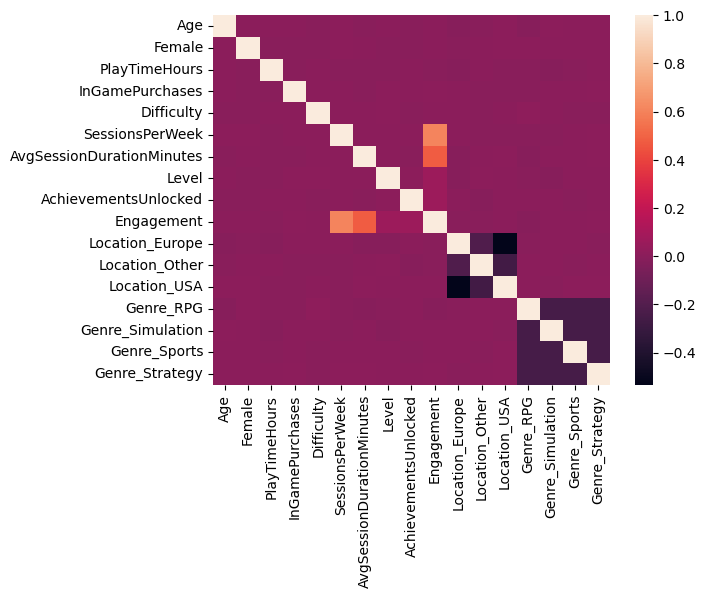

In [16]:
sns.heatmap(corr);

It seems like the best features that correlate the most with engagement are Sessions per Week and Avg Session Duration in Minutes, which makes a lot of sense.

In [17]:
X = df.drop(['PlayerID','Engagement'], axis=1)
y = df['Engagement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)

In [18]:
scaler_allfeats = StandardScaler()
X_train_scaled = scaler_allfeats.fit_transform(X_train)
X_test_scaled = scaler_allfeats.transform(X_test)

# Baseline Model - Logistic regression with all features

In our first Baseline Model using Logistic Regression on our features 

In [19]:
logreg_baseline = LogisticRegression(penalty=None,random_state=19,class_weight='balanced')

In [20]:
logreg_baseline.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', penalty=None, random_state=19)

In [21]:
logreg_baseline.score(X_train_scaled,y_train)

0.7876103247293922

In [22]:
y_baseline = logreg_baseline.predict(X_test_scaled)

In [23]:
logreg_baseline.score(X_train_scaled,y_train)

0.7876103247293922

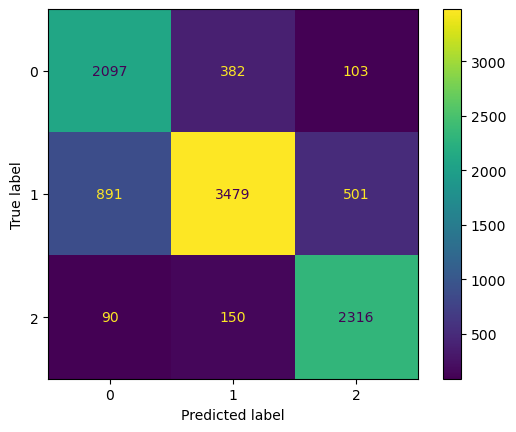

In [24]:
ConfusionMatrixDisplay.from_estimator(logreg_baseline,X_test_scaled,y_test)

In [25]:
accuracy_baseline, recall_baseline, precision_baseline, f1_baseline = accuracy_score(y_test,y_baseline), \
                                                                          recall_score(y_test,y_baseline,average=None), \
                                                                          precision_score(y_test,y_baseline,average=None),\
                                                                          f1_score(y_test,y_baseline,average=None)
accuracy_baseline, recall_baseline, precision_baseline, f1_baseline

(0.7884903586771905,
 array([0.81216112, 0.71422706, 0.90610329]),
 array([0.68128655, 0.86736475, 0.79315068]),
 array([0.7409894 , 0.78338212, 0.8458729 ]))

# Model 2 - Logistic Regression with only the most correlated features

In [26]:
logreg_bestfeats = LogisticRegression(penalty=None,random_state=19,class_weight='balanced')

In [27]:
X_train_bestfeats, X_test_bestfeats, y_train, y_test = train_test_split(X[['SessionsPerWeek','AvgSessionDurationMinutes']], y, test_size=0.25, random_state=19)

In [28]:
scaler_bestfeats = StandardScaler()
X_train_bestfeats_scaled_2 = scaler_bestfeats.fit_transform(X_train_bestfeats)
X_test_bestfeats_scaled_2 = scaler_bestfeats.transform(X_test_bestfeats)

In [29]:
logreg_bestfeats.fit(X_train_bestfeats_scaled_2,y_train)

LogisticRegression(class_weight='balanced', penalty=None, random_state=19)

In [30]:
logreg_bestfeats.score(X_train_bestfeats_scaled_2,y_train)

0.778684429641965

In [31]:
y_bestfeats = logreg_bestfeats.predict(X_test_bestfeats_scaled_2)

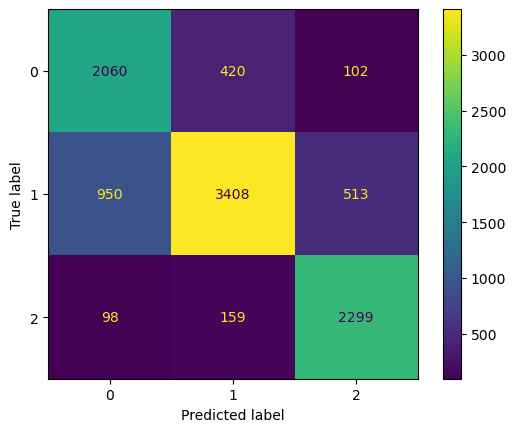

In [32]:
ConfusionMatrixDisplay.from_estimator(logreg_bestfeats,X_test_bestfeats_scaled_2,y_test)

In [33]:
accuracy_bestfeats, recall_bestfeats, precision_bestfeats, f1_bestfeats = accuracy_score(y_test,y_bestfeats), \
                                                                          recall_score(y_test,y_bestfeats,average=None), \
                                                                          precision_score(y_test,y_bestfeats,average=None),\
                                                                          f1_score(y_test,y_bestfeats,average=None)
accuracy_bestfeats, recall_bestfeats ,precision_bestfeats, f1_bestfeats

(0.7760015985612948,
 array([0.79783114, 0.699651  , 0.89945227]),
 array([0.66280566, 0.85477803, 0.7889499 ]),
 array([0.72407733, 0.76947392, 0.84058501]))

# Model 3 - Decision Tree Classifier

In [34]:
dtc_notuning = DecisionTreeClassifier(random_state=19,class_weight='balanced')

In [35]:
dtc_notuning.fit(X_train_scaled,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=19)

In [36]:
dtc_notuning.score(X_train_scaled,y_train)

1.0

In [37]:
y_dtc = dtc_notuning.predict(X_test_scaled)

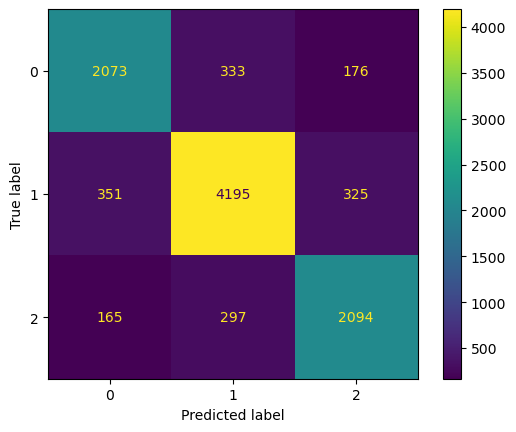

In [38]:
ConfusionMatrixDisplay.from_estimator(dtc_notuning,X_test_scaled,y_test)

In [39]:
accuracy_dtc, recall_dtc, precision_dtc, f1_dtc = accuracy_score(y_test,y_dtc), \
                                                                          recall_score(y_test,y_dtc,average=None), \
                                                                          precision_score(y_test,y_dtc,average=None),\
                                                                          f1_score(y_test,y_dtc,average=None)
accuracy_dtc, recall_dtc ,precision_dtc, f1_dtc

(0.8354480967129584,
 array([0.802866  , 0.86121946, 0.81924883]),
 array([0.80069525, 0.86943005, 0.80693642]),
 array([0.80177915, 0.86530528, 0.81304601]))

## Using Decision Tree as a Feature Selector

In [40]:
feature_used = X_train.columns
dict_feat_importance = {}
for fi, feature in zip(dtc_notuning.feature_importances_, feature_used):
    dict_feat_importance[feature] = fi

dict_feat_importance = dict(sorted(dict_feat_importance.items(), key=lambda item:item[1],reverse=True))
dict_feat_importance

{'AvgSessionDurationMinutes': 0.40013997192889944,
 'SessionsPerWeek': 0.3605432859279194,
 'Level': 0.06120631978372876,
 'AchievementsUnlocked': 0.05480127758729497,
 'PlayTimeHours': 0.04620996153623873,
 'Age': 0.02884475781152879,
 'Difficulty': 0.008046408001127891,
 'Genre_Sports': 0.006379291141852032,
 'InGamePurchases': 0.005355635824667986,
 'Female': 0.004602899225987807,
 'Location_Europe': 0.004446415478437927,
 'Location_USA': 0.0044005395750788025,
 'Genre_RPG': 0.004224751807311071,
 'Location_Other': 0.004024611703580356,
 'Genre_Simulation': 0.003613956567003885,
 'Genre_Strategy': 0.0031599160993421305}

In [41]:
dtc_featselect = DecisionTreeClassifier(max_depth=1,random_state=19)

In [42]:
dtc_featselect.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1, random_state=19)

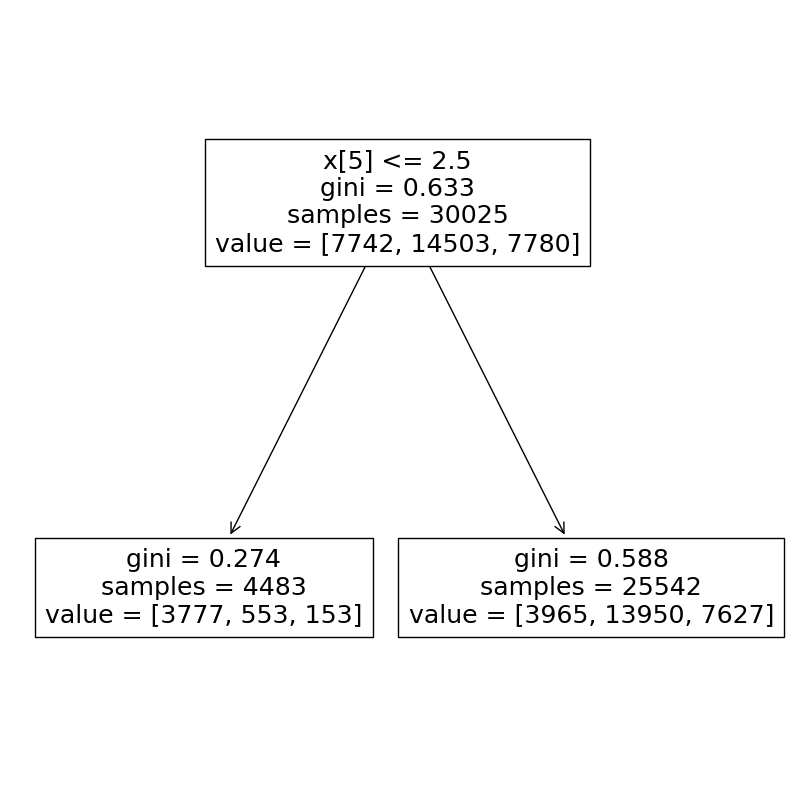

In [43]:
f, ax = plt.subplots(figsize=(10, 10))

plot_tree(dtc_featselect,ax=ax);

In [44]:
X_train.columns[5]

'SessionsPerWeek'

Decison tree classifier found that the most important feature to decide the engagement for a player tends to be the number of Sessions per Week. We divide the original dataset in 2 of them then and run different models for each.

# Model 4 - 2 Logistic Regressions on Sessions Per Week

In [45]:
df

,PlayerID,Age,Female,PlayTimeHours,InGamePurchases,Difficulty,SessionsPerWeek,AvgSessionDurationMinutes,Level,AchievementsUnlocked,Engagement,Location_Europe,Location_Other,Location_USA,Genre_RPG,Genre_Simulation,Genre_Sports,Genre_Strategy
0,9000,43,0,16.271119,0,1,6,108,79,25,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,9001,29,1,5.525961,0,1,5,144,11,10,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,9002,22,1,8.223755,0,0,16,142,35,41,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,9003,35,0,5.265351,1,0,9,85,57,47,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9004,33,0,15.531945,0,1,2,131,95,37,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,0,20.619662,0,0,4,75,85,14,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
40030,49030,44,1,13.539280,0,2,19,114,71,27,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0
40031,49031,15,1,0.240057,1,0,10,176,29,1,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0
40032,49032,34,0,14.017818,1,1,3,128,70,10,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [46]:
X_more = df[df['SessionsPerWeek']>2.5].drop(['PlayerID','Engagement'],axis=1)
X_less = df[df['SessionsPerWeek']<=2.5].drop(['PlayerID','Engagement'],axis=1)

y1_more = df[df['SessionsPerWeek']>2.5]['Engagement']
y2_less = df[df['SessionsPerWeek']<=2.5]['Engagement']

In [47]:
print(f'Shape of X matrix with more than 2.5 sessions per week is {X_more.shape} which is \
{X_more.shape[0]/(X_more.shape[0]+X_less.shape[0]):.03f} of total.')
print(f'Shape of X matrix with less or equal than 2.5 sessions per week is {X_less.shape} which is \
{X_less.shape[0]/(X_more.shape[0]+X_less.shape[0]):.03f} of total.')

Shape of X matrix with more than 2.5 sessions per week is (34069, 16) which is 0.851 of total.
Shape of X matrix with less or equal than 2.5 sessions per week is (5965, 16) which is 0.149 of total.


In [48]:
X_train_more = X_train[X_train['SessionsPerWeek']>2.5]
X_test_more = X_test[X_test['SessionsPerWeek']>2.5]

X_train_less = X_train[X_train['SessionsPerWeek']<=2.5]
X_test_less = X_test[X_test['SessionsPerWeek']<=2.5]

In [49]:
y_train_more = y_train.loc[X_train_more.index]
y_test_more = y_test.loc[X_test_more.index]

y_train_less = y_train.loc[X_train_less.index]
y_test_less = y_test.loc[X_test_less.index]

In [50]:
scaler_more = StandardScaler()
scaler_less = StandardScaler()

X_train_more_scaled = scaler_more.fit_transform(X_train_more)
X_test_more_scaled = scaler_more.transform(X_test_more)

X_train_less_scaled = scaler_less.fit_transform(X_train_less)
X_test_less_scaled = scaler_less.transform(X_test_less)

In [51]:
logreg_more = LogisticRegression(penalty=None, random_state=19, max_iter=10000)
logreg_less = LogisticRegression(penalty=None, random_state=19, max_iter=10000)

In [52]:
logreg_more.fit(X_train_more_scaled,y_train_more)

LogisticRegression(max_iter=10000, penalty=None, random_state=19)

In [53]:
logreg_less.fit(X_train_less_scaled,y_train_less)

LogisticRegression(max_iter=10000, penalty=None, random_state=19)

In [54]:
y_pred_more = logreg_more.predict(X_test_more_scaled)

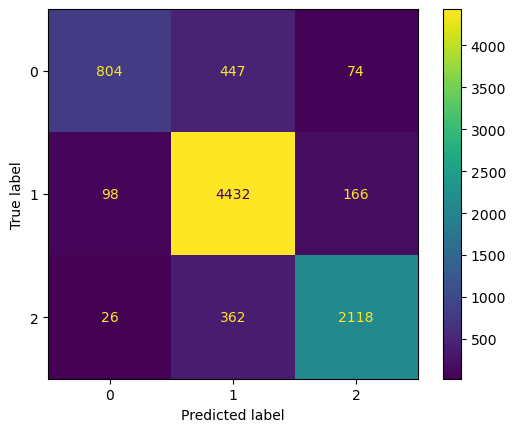

In [55]:
ConfusionMatrixDisplay.from_estimator(logreg_more,X_test_more_scaled,y_test_more)

In [56]:
accuracy_more, recall_more, precision_more, f1_more = accuracy_score(y_test_more,y_pred_more), \
                                                                          recall_score(y_test_more,y_pred_more,average=None), \
                                                                          precision_score(y_test_more,y_pred_more,average=None),\
                                                                          f1_score(y_test_more,y_pred_more,average=None)
accuracy_more, recall_more ,precision_more, f1_more

(0.8624369649349126,
 array([0.60679245, 0.94378194, 0.84517159]),
 array([0.86637931, 0.84564015, 0.89821883]),
 array([0.71371505, 0.89201972, 0.87088816]))

In [57]:
y_pred_less = logreg_less.predict(X_test_less)

/home/cayke/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


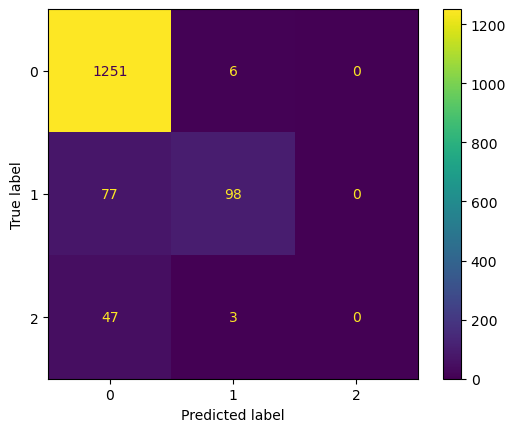

In [58]:
ConfusionMatrixDisplay.from_estimator(logreg_less,X_test_less_scaled,y_test_less)

In [59]:
accuracy_less, recall_less, precision_less, f1_less = accuracy_score(y_test_less,y_pred_less), \
                                                                          recall_score(y_test_less,y_pred_less,average=None,zero_division=0), \
                                                                          precision_score(y_test_less,y_pred_less,average=None),\
                                                                          f1_score(y_test_less,y_pred_less,average=None)
accuracy_less, recall_less ,precision_less, f1_less

/home/cayke/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.11808367071524967,
 array([0., 1., 0.]),
 array([0.        , 0.11808367, 0.        ]),
 array([0.        , 0.21122511, 0.        ]))

In [60]:
y_test_2dfs = np.concatenate([y_test_more,y_test_less])
y_pred_2dfs = np.concatenate([y_pred_more,y_pred_less])

In [104]:
accuracy_2dfs, recall_2dfs, precision_2dfs, f1_2dfs = accuracy_score(y_test_2dfs,y_pred_2dfs), \
                                                                          recall_score(y_test_2dfs,y_pred_2dfs,average=None,zero_division=0), \
                                                                          precision_score(y_test_2dfs,y_pred_2dfs,average=None),\
                                                                          f1_score(y_test_2dfs,y_pred_2dfs,average=None)
accuracy_2dfs, recall_2dfs ,precision_2dfs, f1_2dfs

(0.7522229993006294,
 0.7522229993006294,
 0.7522229993006294,
 0.7522229993006293)

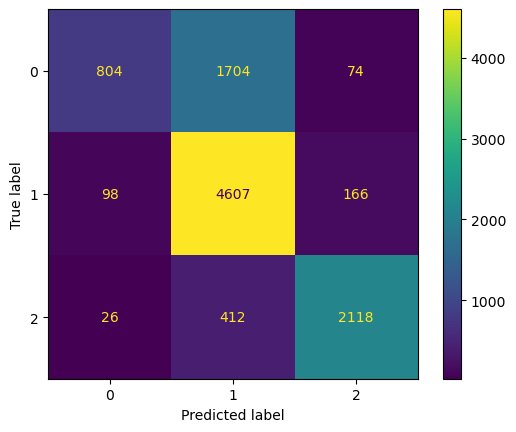

In [62]:
ConfusionMatrixDisplay.from_predictions(y_test_2dfs,y_pred_2dfs)

# Model 5 - Hyperparameter Tuned Decision Tree

In [63]:
param = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
} 
dtc_tuning = DecisionTreeClassifier(random_state=19,class_weight='balanced')

grid_search = GridSearchCV(estimator=dtc_tuning, param_grid=param, scoring='precision_micro', cv=5, n_jobs=-1, 
                           verbose=1,return_train_score=True)

In [64]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=19),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='precision_micro', verbose=1)

In [65]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [66]:
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [67]:
best_estimator.score(X_train_scaled,y_train)

0.9230308076602831

In [68]:
best_estimator

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=4, random_state=19)

In [69]:
y_pred_tuning = best_estimator.predict(X_test_scaled)

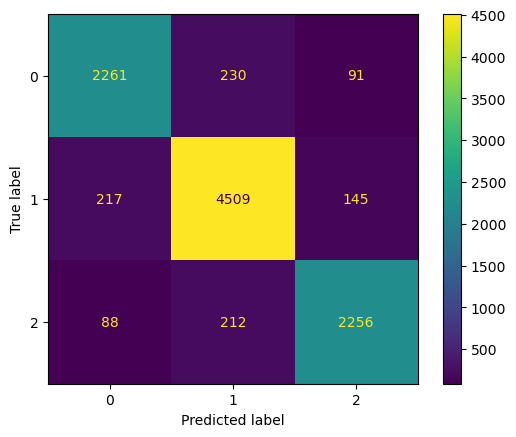

In [70]:
ConfusionMatrixDisplay.from_estimator(best_estimator,X_test_scaled,y_test)

In [103]:
accuracy_tuning, recall_tuning, precision_tuning, f1_tuning = accuracy_score(y_test,y_pred_tuning), \
                                                                          recall_score(y_test,y_pred_tuning,average=None), \
                                                                          precision_score(y_test,y_pred_tuning,average=None),\
                                                                          f1_score(y_test,y_pred_tuning,average=None)
accuracy_tuning, recall_tuning ,precision_tuning, f1_tuning

(0.9017883904485963,
 0.9017883904485963,
 0.9017883904485963,
 0.9017883904485963)

# Weighted Average Engagement

In order to predict a game's sucess we try to predict how different main features can achieve a better engagement from players. For that, we focus on the American market.

In [72]:
df

,PlayerID,Age,Female,PlayTimeHours,InGamePurchases,Difficulty,SessionsPerWeek,AvgSessionDurationMinutes,Level,AchievementsUnlocked,Engagement,Location_Europe,Location_Other,Location_USA,Genre_RPG,Genre_Simulation,Genre_Sports,Genre_Strategy
0,9000,43,0,16.271119,0,1,6,108,79,25,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,9001,29,1,5.525961,0,1,5,144,11,10,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,9002,22,1,8.223755,0,0,16,142,35,41,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,9003,35,0,5.265351,1,0,9,85,57,47,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9004,33,0,15.531945,0,1,2,131,95,37,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,0,20.619662,0,0,4,75,85,14,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
40030,49030,44,1,13.539280,0,2,19,114,71,27,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0
40031,49031,15,1,0.240057,1,0,10,176,29,1,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0
40032,49032,34,0,14.017818,1,1,3,128,70,10,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [73]:
df1 = df[df['Location_USA']==1].drop(['PlayerID','Location_USA','Location_Europe','Location_Other'],axis=1)
df1

,Age,Female,PlayTimeHours,InGamePurchases,Difficulty,SessionsPerWeek,AvgSessionDurationMinutes,Level,AchievementsUnlocked,Engagement,Genre_RPG,Genre_Simulation,Genre_Sports,Genre_Strategy
1,29,1,5.525961,0,1,5,144,11,10,1,0.0,0.0,0.0,1.0
2,22,1,8.223755,0,0,16,142,35,41,2,0.0,0.0,1.0,0.0
3,35,0,5.265351,1,0,9,85,57,47,1,0.0,0.0,0.0,0.0
6,25,0,9.752716,0,2,1,50,13,2,0,0.0,0.0,0.0,0.0
10,17,0,4.829916,0,2,8,95,14,12,2,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40028,36,0,1.020489,0,2,4,34,97,21,0,1.0,0.0,0.0,0.0
40029,32,0,20.619662,0,0,4,75,85,14,1,0.0,0.0,0.0,1.0
40031,15,1,0.240057,1,0,10,176,29,1,2,1.0,0.0,0.0,0.0
40032,34,0,14.017818,1,1,3,128,70,10,1,0.0,0.0,1.0,0.0


In [75]:
age_range = [20,31,43]
r_age_15_25 = len(df1[(df1['Age']>=15) & (df1['Age']<=25)])/len(df1)
r_age_26_36 = len(df1[(df1['Age']>=26) & (df1['Age']<=36)])/len(df1)
r_age_37_47 = len(df1[(df1['Age']>=37) & (df1['Age']<=47)])/len(df1)
r_age_range = [r_age_15_25,r_age_26_36,r_age_37_47]

gender_range = [0,1]
r_male = len(df1['Female']==0)/len(df1)
r_female = len(df1['Female']==1)/len(df1)
r_gender_range = [r_male,r_female]

playtime_range = [4,12,20]
r_playtime_0_8 = len(df1[df1['PlayTimeHours']<=8])/len(df1)
r_playtime_8_16 = len(df1[(df1['PlayTimeHours']>8) & (df1['PlayTimeHours']<=16)])/len(df1)
r_playtime_16_24 = len(df1[df1['PlayTimeHours']>16])/len(df1)
r_playtime_range = [r_playtime_0_8, r_playtime_8_16, r_playtime_16_24]

purchase_range = [0,1]
r_nopurchases = len(df1[df1['InGamePurchases']==0])/len(df1)
r_purchases = len(df1[df1['InGamePurchases']==1])/len(df1)
r_purchase_range = [r_nopurchases,r_purchases]

difficulty_range = [0,1,2]
r_easy = len(df1['Difficulty']==0)/len(df1)
r_medium = len(df1['Difficulty']==1)/len(df1)
r_hard = len(df1['Difficulty']==2)/len(df1)
r_difficulty_range = [r_easy,r_medium,r_hard]

sessions_range = [3,9,15]
r_sessions_0_6 = len(df1[df1['SessionsPerWeek']<=6])/len(df1)
r_sessions_6_12 = len(df1[(df1['SessionsPerWeek']>6) & (df1['SessionsPerWeek']<=12)])/len(df1)
r_sessions_12_18 = len(df1[df1['SessionsPerWeek']>12])/len(df1)
r_sessions_range = [r_sessions_0_6, r_sessions_6_12, r_sessions_12_18]

avgsessions_range = [38,94,150]
r_avgsessions_0_66 = len(df1[df1['AvgSessionDurationMinutes']<=66])/len(df1)
r_avgsessions_66_122 = len(df1[(df1['AvgSessionDurationMinutes']>66) & (df1['AvgSessionDurationMinutes']<=122)])/len(df1)
r_avgsessions_122_178 = len(df1[(df1['AvgSessionDurationMinutes']>122) & (df1['AvgSessionDurationMinutes']<=178)])/len(df1)
r_avgsessions_range = [r_avgsessions_0_66, r_avgsessions_66_122, r_avgsessions_122_178]

level_range = [17,50,83]
r_lvl_1_33 = len(df1[df1['Level']<=33])/len(df1)
r_lvl_33_65 = len(df1[(df1['Level']>33) & (df1['Level']<=65)])/len(df1)
r_lvl_65_97 = len(df1[(df1['Level']>65) & (df1['Level']<=97)])/len(df1)
r_lvl_range = [r_lvl_1_33, r_lvl_33_65, r_lvl_65_97]

achievement_range = [9,25,41]
r_achiev_0_16 = len(df1[df1['Level']<=16])/len(df1)
r_achiev_16_32 = len(df1[(df1['Level']>16) & (df1['Level']<=32)])/len(df1)
r_achiev_32_48 = len(df1[(df1['Level']>32) & (df1['Level']<=48)])/len(df1)
r_achievement_range = [r_achiev_0_16,r_achiev_16_32,r_achiev_32_48]

rpg_range = [0,1]
r_norpg = len(df1['Genre_RPG']==0)/len(df1)
r_rpg = len(df1['Genre_RPG']==1)/len(df1)
r_rpg_range=[r_norpg,r_rpg]

sim_range = [0,1]
r_nosim = len(df1['Genre_Simulation']==0)/len(df1)
r_sim = len(df1['Genre_Simulation']==1)/len(df1)
r_sim_range = [r_nosim, r_sim]

sports_range = [0,1]
r_nosports = len(df1['Genre_Sports']==0)/len(df1)
r_sports = len(df1['Genre_Sports']==1)/len(df1)
r_sports_range = [r_nosports,r_sports]

strat_range = [0,1]
r_nostrat = len(df1['Genre_Strategy']==0)/len(df1)
r_strat = len(df1['Genre_Strategy']==1)/len(df1)
r_strat_range = [r_nostrat,r_strat]


## Weighted Average Engagement - Comparing Age Groups

In [76]:
import warnings
warnings.filterwarnings("ignore")
norm1,norm2,norm3 = 0,0,0
total_engagement_age1,total_engagement_age2,total_engagement_age3 = 0,0,0
for age,age_prop in zip(age_range,r_age_range):
    for gender, gender_prop in zip(gender_range,r_gender_range):
        for playtime, playtime_prop in zip(playtime_range, r_playtime_range):
            for purchase, purchase_prop in zip(purchase_range,r_purchase_range):
                for difficulty, difficulty_prop in zip(difficulty_range,r_difficulty_range):
                    for sessions, sessions_prop in zip(sessions_range,r_sessions_range):
                        for avgsessions, avgsessions_prop in zip(avgsessions_range,r_avgsessions_range):
                            for level, level_prop in zip(level_range,r_lvl_range):
                                for achievement,achievement_prop in zip(achievement_range,r_achievement_range):
                                    for rpg,rpg_prop in zip(rpg_range,r_rpg_range):
                                        for sim,sim_prop in zip(sim_range,r_sim_range):
                                            for sports,sports_prop in zip(sports_range,r_sports_range):
                                                for strat, strat_prop in zip(strat_range,r_strat_range):
                                                    if sum([rpg,sim,sports,strat])>1:
                                                        continue
                                                    total_prop = age_prop*gender_prop*playtime_prop*purchase_prop*difficulty_prop*sessions_prop*avgsessions_prop*level_prop*achievement_prop*rpg_prop*sim_prop*sports_prop*strat_prop
                                                    
                                                    X_topredict = np.array([age,gender,playtime,purchase,difficulty,sessions,avgsessions,level,achievement,0,0,1,rpg,sim,sports,strat]).reshape(1,-1)
                                                    X_topredict_scaled = scaler_allfeats.transform(X_topredict)
                                                    if   age==age_range[0]:
                                                        norm1 += total_prop
                                                        total_engagement_age1 += total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    elif age==age_range[1]:
                                                        norm2 += total_prop
                                                        total_engagement_age2 +=total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    else:
                                                        norm3 += total_prop
                                                        total_engagement_age3 +=total_prop*best_estimator.predict(X_topredict_scaled)[0]


total_engagement_age1,total_engagement_age2,total_engagement_age3 = total_engagement_age1/norm1,total_engagement_age2/norm2,total_engagement_age3/norm3

In [77]:
print(total_engagement_age1,total_engagement_age2,total_engagement_age3)

1.0651184364605106 1.0651184364605024 1.0651184364605129


Total Proportional Engagement for Age Groups are:
- Ages between 15-25: 1.065
- Ages between 26-36: 1.065
- Ages between 37-47: 1.065

## Weighted Average Engagement - Comparing Gender

In [78]:
total_engagement_male,total_engagement_female = 0,0
norm1,norm2,norm3 = 0,0,0
for age,age_prop in zip(age_range,r_age_range):
    for gender, gender_prop in zip(gender_range,r_gender_range):
        for playtime, playtime_prop in zip(playtime_range, r_playtime_range):
            for purchase, purchase_prop in zip(purchase_range,r_purchase_range):
                for difficulty, difficulty_prop in zip(difficulty_range,r_difficulty_range):
                    for sessions, sessions_prop in zip(sessions_range,r_sessions_range):
                        for avgsessions, avgsessions_prop in zip(avgsessions_range,r_avgsessions_range):
                            for level, level_prop in zip(level_range,r_lvl_range):
                                for achievement,achievement_prop in zip(achievement_range,r_achievement_range):
                                    for rpg,rpg_prop in zip(rpg_range,r_rpg_range):
                                        for sim,sim_prop in zip(sim_range,r_sim_range):
                                            for sports,sports_prop in zip(sports_range,r_sports_range):
                                                for strat, strat_prop in zip(strat_range,r_strat_range):
                                                    if sum([rpg,sim,sports,strat])>1:
                                                        continue
                                                    total_prop = age_prop*gender_prop*playtime_prop*purchase_prop*difficulty_prop*sessions_prop*avgsessions_prop*level_prop*achievement_prop*rpg_prop*sim_prop*sports_prop*strat_prop
                                                    
                                                    X_topredict = np.array([age,gender,playtime,purchase,difficulty,sessions,avgsessions,level,achievement,0,0,1,rpg,sim,sports,strat]).reshape(1,-1)
                                                    X_topredict_scaled = scaler_allfeats.transform(X_topredict)
                                                    if   gender==gender_range[0]:
                                                        norm1 += total_prop
                                                        total_engagement_male += total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    else:
                                                        norm2 += total_prop
                                                        total_engagement_female +=total_prop*best_estimator.predict(X_topredict_scaled)[0]

total_engagement_male,total_engagement_female = total_engagement_male/norm1,total_engagement_female/norm2

In [79]:
total_engagement_male,total_engagement_female

(1.0651184364605024, 1.0651184364605024)

Total Proportional Engagement for Gender Groups are:
- Males: 1.065
- Female: 1.065

## Weighted Average Engagement - Comparing Playtime

In [80]:
total_engagement_playtime1,total_engagement_playtime2,total_engagement_playtime3 = 0,0,0
norm1,norm2,norm3 = 0,0,0
for age,age_prop in zip(age_range,r_age_range):
    for gender, gender_prop in zip(gender_range,r_gender_range):
        for playtime, playtime_prop in zip(playtime_range, r_playtime_range):
            for purchase, purchase_prop in zip(purchase_range,r_purchase_range):
                for difficulty, difficulty_prop in zip(difficulty_range,r_difficulty_range):
                    for sessions, sessions_prop in zip(sessions_range,r_sessions_range):
                        for avgsessions, avgsessions_prop in zip(avgsessions_range,r_avgsessions_range):
                            for level, level_prop in zip(level_range,r_lvl_range):
                                for achievement,achievement_prop in zip(achievement_range,r_achievement_range):
                                    for rpg,rpg_prop in zip(rpg_range,r_rpg_range):
                                        for sim,sim_prop in zip(sim_range,r_sim_range):
                                            for sports,sports_prop in zip(sports_range,r_sports_range):
                                                for strat, strat_prop in zip(strat_range,r_strat_range):
                                                    if sum([rpg,sim,sports,strat])>1:
                                                        continue
                                                    total_prop = age_prop*gender_prop*playtime_prop*purchase_prop*difficulty_prop*sessions_prop*avgsessions_prop*level_prop*achievement_prop*rpg_prop*sim_prop*sports_prop*strat_prop
                                                    
                                                    X_topredict = np.array([age,gender,playtime,purchase,difficulty,sessions,avgsessions,level,achievement,0,0,1,rpg,sim,sports,strat]).reshape(1,-1)
                                                    X_topredict_scaled = scaler_allfeats.transform(X_topredict)
                                                    if   playtime==playtime_range[0]:
                                                        norm1 += total_prop
                                                        total_engagement_playtime1 += total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    elif playtime==playtime_range[1]:
                                                        norm2 += total_prop
                                                        total_engagement_playtime2 +=total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    else:
                                                        norm3 += total_prop
                                                        total_engagement_playtime3 +=total_prop*best_estimator.predict(X_topredict_scaled)[0]

total_engagement_playtime1,total_engagement_playtime2,total_engagement_playtime3 = total_engagement_playtime1/norm1,total_engagement_playtime2/norm2,total_engagement_playtime3/norm3

In [81]:
total_engagement_playtime1,total_engagement_playtime2,total_engagement_playtime3

(1.0651184364605293, 1.0651184364605044, 1.0651184364605135)

Total Proportional Engagement for Playtime Groups are:
- Playtime between 0-8: 1.065
- Playtime between 8-16: 1.065
- Playtime between 16-24: 1.065

## Weighted Average Engagement - Comparing InGamePurchases

In [82]:
total_engagement_nopurchase,total_engagement_purchase = 0,0
norm1,norm2,norm3 = 0,0,0
for age,age_prop in zip(age_range,r_age_range):
    for gender, gender_prop in zip(gender_range,r_gender_range):
        for playtime, playtime_prop in zip(playtime_range, r_playtime_range):
            for purchase, purchase_prop in zip(purchase_range,r_purchase_range):
                for difficulty, difficulty_prop in zip(difficulty_range,r_difficulty_range):
                    for sessions, sessions_prop in zip(sessions_range,r_sessions_range):
                        for avgsessions, avgsessions_prop in zip(avgsessions_range,r_avgsessions_range):
                            for level, level_prop in zip(level_range,r_lvl_range):
                                for achievement,achievement_prop in zip(achievement_range,r_achievement_range):
                                    for rpg,rpg_prop in zip(rpg_range,r_rpg_range):
                                        for sim,sim_prop in zip(sim_range,r_sim_range):
                                            for sports,sports_prop in zip(sports_range,r_sports_range):
                                                for strat, strat_prop in zip(strat_range,r_strat_range):
                                                    if sum([rpg,sim,sports,strat])>1:
                                                        continue
                                                    total_prop = age_prop*gender_prop*playtime_prop*purchase_prop*difficulty_prop*sessions_prop*avgsessions_prop*level_prop*achievement_prop*rpg_prop*sim_prop*sports_prop*strat_prop
                                                    
                                                    X_topredict = np.array([age,gender,playtime,purchase,difficulty,sessions,avgsessions,level,achievement,0,0,1,rpg,sim,sports,strat]).reshape(1,-1)
                                                    X_topredict_scaled = scaler_allfeats.transform(X_topredict)
                                                    if   purchase==purchase_range[0]:
                                                        norm1 += total_prop
                                                        total_engagement_nopurchase += total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    else:
                                                        norm2 += total_prop
                                                        total_engagement_purchase +=total_prop*best_estimator.predict(X_topredict_scaled)[0]

total_engagement_nopurchase,total_engagement_purchase = total_engagement_nopurchase/norm1,total_engagement_purchase/norm2

In [83]:
total_engagement_nopurchase,total_engagement_purchase

(1.0651184364605162, 1.065118436460508)

Total Proportional Engagement for InGamePurchase Groups are:
- No In Game Purchases: 1.065
- In Game Purchases: 1.065

## Weighted Average Engagement - Comparing Difficulty Groups

In [84]:
import warnings
warnings.filterwarnings("ignore")

total_engagement_difficulty1,total_engagement_difficulty2,total_engagement_difficulty3 = 0,0,0
norm1,norm2,norm3 = 0,0,0
for age,age_prop in zip(age_range,r_age_range):
    for gender, gender_prop in zip(gender_range,r_gender_range):
        for playtime, playtime_prop in zip(playtime_range, r_playtime_range):
            for purchase, purchase_prop in zip(purchase_range,r_purchase_range):
                for difficulty, difficulty_prop in zip(difficulty_range,r_difficulty_range):
                    for sessions, sessions_prop in zip(sessions_range,r_sessions_range):
                        for avgsessions, avgsessions_prop in zip(avgsessions_range,r_avgsessions_range):
                            for level, level_prop in zip(level_range,r_lvl_range):
                                for achievement,achievement_prop in zip(achievement_range,r_achievement_range):
                                    for rpg,rpg_prop in zip(rpg_range,r_rpg_range):
                                        for sim,sim_prop in zip(sim_range,r_sim_range):
                                            for sports,sports_prop in zip(sports_range,r_sports_range):
                                                for strat, strat_prop in zip(strat_range,r_strat_range):
                                                    if sum([rpg,sim,sports,strat])>1:
                                                        continue
                                                    total_prop = age_prop*gender_prop*playtime_prop*purchase_prop*difficulty_prop*sessions_prop*avgsessions_prop*level_prop*achievement_prop*rpg_prop*sim_prop*sports_prop*strat_prop
                                                    
                                                    X_topredict = np.array([age,gender,playtime,purchase,difficulty,sessions,avgsessions,level,achievement,0,0,1,rpg,sim,sports,strat]).reshape(1,-1)
                                                    X_topredict_scaled = scaler_allfeats.transform(X_topredict)
                                                    if   difficulty==difficulty_range[0]:
                                                        norm1 += total_prop
                                                        total_engagement_difficulty1 += total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    elif difficulty==difficulty_range[1]:
                                                        norm2 += total_prop
                                                        total_engagement_difficulty2 +=total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    else:
                                                        norm3 += total_prop
                                                        total_engagement_difficulty3 +=total_prop*best_estimator.predict(X_topredict_scaled)[0]

total_engagement_difficulty1,total_engagement_difficulty2,total_engagement_difficulty3 = total_engagement_difficulty1/norm1,total_engagement_difficulty2/norm2,total_engagement_difficulty3/norm3

In [85]:
print(total_engagement_difficulty1,total_engagement_difficulty2,total_engagement_difficulty3)

1.0651184364605113 1.0651184364605113 1.0651184364605113


Total Proportional Engagement for Difficulty Groups are:
- Difficulty Easy: 1.065
- Difficulty Medium: 1.065
- Difficulty Hard: 1.065

## Weighted Average Engagement - Comparing Number of Sessions Groups

In [86]:
import warnings
warnings.filterwarnings("ignore")

total_engagement_sessions1,total_engagement_sessions2,total_engagement_sessions3 = 0,0,0
norm1,norm2,norm3 = 0,0,0
for age,age_prop in zip(age_range,r_age_range):
    for gender, gender_prop in zip(gender_range,r_gender_range):
        for playtime, playtime_prop in zip(playtime_range, r_playtime_range):
            for purchase, purchase_prop in zip(purchase_range,r_purchase_range):
                for difficulty, difficulty_prop in zip(difficulty_range,r_difficulty_range):
                    for sessions, sessions_prop in zip(sessions_range,r_sessions_range):
                        for avgsessions, avgsessions_prop in zip(avgsessions_range,r_avgsessions_range):
                            for level, level_prop in zip(level_range,r_lvl_range):
                                for achievement,achievement_prop in zip(achievement_range,r_achievement_range):
                                    for rpg,rpg_prop in zip(rpg_range,r_rpg_range):
                                        for sim,sim_prop in zip(sim_range,r_sim_range):
                                            for sports,sports_prop in zip(sports_range,r_sports_range):
                                                for strat, strat_prop in zip(strat_range,r_strat_range):
                                                    if sum([rpg,sim,sports,strat])>1:
                                                        continue
                                                    total_prop = age_prop*gender_prop*playtime_prop*purchase_prop*difficulty_prop*sessions_prop*avgsessions_prop*level_prop*achievement_prop*rpg_prop*sim_prop*sports_prop*strat_prop
                                                    
                                                    X_topredict = np.array([age,gender,playtime,purchase,difficulty,sessions,avgsessions,level,achievement,0,0,1,rpg,sim,sports,strat]).reshape(1,-1)
                                                    X_topredict_scaled = scaler_allfeats.transform(X_topredict)
                                                    if   sessions==sessions_range[0]:
                                                        norm1 += total_prop
                                                        total_engagement_sessions1 += total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    elif sessions==sessions_range[1]:
                                                        norm2 += total_prop
                                                        total_engagement_sessions2 +=total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    else:
                                                        norm3 += total_prop
                                                        total_engagement_sessions3 +=total_prop*best_estimator.predict(X_topredict_scaled)[0]

total_engagement_sessions1,total_engagement_sessions2,total_engagement_sessions3 = total_engagement_sessions1/norm1,total_engagement_sessions2/norm2,total_engagement_sessions3/norm3

In [87]:
print(total_engagement_sessions1,total_engagement_sessions2,total_engagement_sessions3)

0.4074577133914237 1.1458656146797594 1.6659122343769686


Total Proportional Engagement for Sessions Per Week Groups are:
- Sessions 0-6: 0.40
- Sessions 6-12: 1.14
- Sessions 12-18: 1.66

## Weighted Average Engagement - Comparing Average Session Duration in Minutes Groups

In [88]:
import warnings
warnings.filterwarnings("ignore")

total_engagement_avgsessions1,total_engagement_avgsessions2,total_engagement_avgsessions3 = 0,0,0
norm1,norm2,norm3 = 0,0,0
for age,age_prop in zip(age_range,r_age_range):
    for gender, gender_prop in zip(gender_range,r_gender_range):
        for playtime, playtime_prop in zip(playtime_range, r_playtime_range):
            for purchase, purchase_prop in zip(purchase_range,r_purchase_range):
                for difficulty, difficulty_prop in zip(difficulty_range,r_difficulty_range):
                    for sessions, sessions_prop in zip(sessions_range,r_sessions_range):
                        for avgsessions, avgsessions_prop in zip(avgsessions_range,r_avgsessions_range):
                            for level, level_prop in zip(level_range,r_lvl_range):
                                for achievement,achievement_prop in zip(achievement_range,r_achievement_range):
                                    for rpg,rpg_prop in zip(rpg_range,r_rpg_range):
                                        for sim,sim_prop in zip(sim_range,r_sim_range):
                                            for sports,sports_prop in zip(sports_range,r_sports_range):
                                                for strat, strat_prop in zip(strat_range,r_strat_range):
                                                    if sum([rpg,sim,sports,strat])>1:
                                                        continue
                                                    total_prop = age_prop*gender_prop*playtime_prop*purchase_prop*difficulty_prop*sessions_prop*avgsessions_prop*level_prop*achievement_prop*rpg_prop*sim_prop*sports_prop*strat_prop
                                                    
                                                    X_topredict = np.array([age,gender,playtime,purchase,difficulty,sessions,avgsessions,level,achievement,0,0,1,rpg,sim,sports,strat]).reshape(1,-1)
                                                    X_topredict_scaled = scaler_allfeats.transform(X_topredict)
                                                    if   avgsessions==avgsessions_range[0]:
                                                        norm1 += total_prop
                                                        total_engagement_avgsessions1 += total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    elif avgsessions==avgsessions_range[1]:
                                                        norm2 += total_prop
                                                        total_engagement_avgsessions2 +=total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    else:
                                                        norm3 += total_prop
                                                        total_engagement_avgsessions3 +=total_prop*best_estimator.predict(X_topredict_scaled)[0]

total_engagement_avgsessions1,total_engagement_avgsessions2,total_engagement_sessions3 = total_engagement_avgsessions1/norm1,total_engagement_avgsessions2/norm2,total_engagement_sessions3/norm3

In [89]:
print(total_engagement_avgsessions1,total_engagement_avgsessions2,total_engagement_sessions3)

0.6464374999999846 1.069472716231037 0.36906213091441387


Total Proportional Engagement for Average Session in Minutes Groups are:
- Average Session In Between 10-66min: 0.64
- Average Session In Between 66-122min: 1.06
- Average Session In Between 122-178min: 0.36

## Weighted Average Engagement - Comparing Level Groups

In [90]:
import warnings
warnings.filterwarnings("ignore")

total_engagement_level1,total_engagement_level2,total_engagement_level3 = 0,0,0
norm1,norm2,norm3 = 0,0,0
for age,age_prop in zip(age_range,r_age_range):
    for gender, gender_prop in zip(gender_range,r_gender_range):
        for playtime, playtime_prop in zip(playtime_range, r_playtime_range):
            for purchase, purchase_prop in zip(purchase_range,r_purchase_range):
                for difficulty, difficulty_prop in zip(difficulty_range,r_difficulty_range):
                    for sessions, sessions_prop in zip(sessions_range,r_sessions_range):
                        for avgsessions, avgsessions_prop in zip(avgsessions_range,r_avgsessions_range):
                            for level, level_prop in zip(level_range,r_lvl_range):
                                for achievement,achievement_prop in zip(achievement_range,r_achievement_range):
                                    for rpg,rpg_prop in zip(rpg_range,r_rpg_range):
                                        for sim,sim_prop in zip(sim_range,r_sim_range):
                                            for sports,sports_prop in zip(sports_range,r_sports_range):
                                                for strat, strat_prop in zip(strat_range,r_strat_range):
                                                    if sum([rpg,sim,sports,strat])>1:
                                                        continue
                                                    total_prop = age_prop*gender_prop*playtime_prop*purchase_prop*difficulty_prop*sessions_prop*avgsessions_prop*level_prop*achievement_prop*rpg_prop*sim_prop*sports_prop*strat_prop
                                                    
                                                    X_topredict = np.array([age,gender,playtime,purchase,difficulty,sessions,avgsessions,level,achievement,0,0,1,rpg,sim,sports,strat]).reshape(1,-1)
                                                    X_topredict_scaled = scaler_allfeats.transform(X_topredict)
                                                    if   level==level_range[0]:
                                                        norm1 += total_prop
                                                        total_engagement_level1 += total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    elif level==level_range[1]:
                                                        norm2 += total_prop
                                                        total_engagement_level2 +=total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    else:
                                                        norm3 += total_prop
                                                        total_engagement_level3 +=total_prop*best_estimator.predict(X_topredict_scaled)[0]

total_engagement_level1,total_engagement_level2,total_engagement_level3 = total_engagement_level1/norm1,total_engagement_level2/norm2,total_engagement_level3/norm3

In [91]:
print(total_engagement_level1,total_engagement_level2,total_engagement_level3)

0.996263689802591 1.0627962210614372 1.1397048109185937


Total Proportional Engagement for Level Groups are:
- Level in Between 1-34: 0.99
- Level in Between 34-67: 1.06
- level in Between 67-99: 1.13

## Weighted Average Engagement - Comparing Achievement Groups

In [92]:
import warnings
warnings.filterwarnings("ignore")

total_engagement_achievement1,total_engagement_achievement2,total_engagement_achievement3 = 0,0,0
norm1,norm2,norm3 = 0,0,0
for age,age_prop in zip(age_range,r_age_range):
    for gender, gender_prop in zip(gender_range,r_gender_range):
        for playtime, playtime_prop in zip(playtime_range, r_playtime_range):
            for purchase, purchase_prop in zip(purchase_range,r_purchase_range):
                for difficulty, difficulty_prop in zip(difficulty_range,r_difficulty_range):
                    for sessions, sessions_prop in zip(sessions_range,r_sessions_range):
                        for avgsessions, avgsessions_prop in zip(avgsessions_range,r_avgsessions_range):
                            for level, level_prop in zip(level_range,r_lvl_range):
                                for achievement,achievement_prop in zip(achievement_range,r_achievement_range):
                                    for rpg,rpg_prop in zip(rpg_range,r_rpg_range):
                                        for sim,sim_prop in zip(sim_range,r_sim_range):
                                            for sports,sports_prop in zip(sports_range,r_sports_range):
                                                for strat, strat_prop in zip(strat_range,r_strat_range):
                                                    if sum([rpg,sim,sports,strat])>1:
                                                        continue
                                                    total_prop = age_prop*gender_prop*playtime_prop*purchase_prop*difficulty_prop*sessions_prop*avgsessions_prop*level_prop*achievement_prop*rpg_prop*sim_prop*sports_prop*strat_prop
                                                    
                                                    X_topredict = np.array([age,gender,playtime,purchase,difficulty,sessions,avgsessions,level,achievement,0,0,1,rpg,sim,sports,strat]).reshape(1,-1)
                                                    X_topredict_scaled = scaler_allfeats.transform(X_topredict)
                                                    if   achievement==achievement_range[0]:
                                                        norm1 += total_prop
                                                        total_engagement_achievement1 += total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    elif achievement==achievement_range[1]:
                                                        norm2 += total_prop
                                                        total_engagement_achievement2 +=total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    else:
                                                        norm3 += total_prop
                                                        total_engagement_achievement3 +=total_prop*best_estimator.predict(X_topredict_scaled)[0]

total_engagement_achievement1,total_engagement_achievement2,total_engagement_achievement3 = total_engagement_achievement1/norm1,total_engagement_achievement2/norm2,total_engagement_achievement3/norm3

In [93]:
print(total_engagement_achievement1,total_engagement_achievement2,total_engagement_achievement3)

0.9962636898025888 1.100582174688662 1.100582174688683


Total Proportional Engagement for Achievement Groups are:
- Level in Between 0-16: 0.99
- Level in Between 16-32: 1.10
- level in Between 32-48: 1.10

## Weighted Average Engagement - Comparing RPG

In [94]:
total_engagement_norpg,total_engagement_rpg = 0,0
norm1,norm2,norm3 = 0,0,0
for age,age_prop in zip(age_range,r_age_range):
    for gender, gender_prop in zip(gender_range,r_gender_range):
        for playtime, playtime_prop in zip(playtime_range, r_playtime_range):
            for purchase, purchase_prop in zip(purchase_range,r_purchase_range):
                for difficulty, difficulty_prop in zip(difficulty_range,r_difficulty_range):
                    for sessions, sessions_prop in zip(sessions_range,r_sessions_range):
                        for avgsessions, avgsessions_prop in zip(avgsessions_range,r_avgsessions_range):
                            for level, level_prop in zip(level_range,r_lvl_range):
                                for achievement,achievement_prop in zip(achievement_range,r_achievement_range):
                                    for rpg,rpg_prop in zip(rpg_range,r_rpg_range):
                                        for sim,sim_prop in zip(sim_range,r_sim_range):
                                            for sports,sports_prop in zip(sports_range,r_sports_range):
                                                for strat, strat_prop in zip(strat_range,r_strat_range):
                                                    if sum([rpg,sim,sports,strat])>1:
                                                        continue
                                                    total_prop = age_prop*gender_prop*playtime_prop*purchase_prop*difficulty_prop*sessions_prop*avgsessions_prop*level_prop*achievement_prop*rpg_prop*sim_prop*sports_prop*strat_prop
                                                    
                                                    X_topredict = np.array([age,gender,playtime,purchase,difficulty,sessions,avgsessions,level,achievement,0,0,1,rpg,sim,sports,strat]).reshape(1,-1)
                                                    X_topredict_scaled = scaler_allfeats.transform(X_topredict)
                                                    if   rpg==rpg_range[0]:
                                                        norm1 += total_prop
                                                        total_engagement_norpg += total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    else:
                                                        norm2 += total_prop
                                                        total_engagement_rpg +=total_prop*best_estimator.predict(X_topredict_scaled)[0]


total_engagement_norpg,total_engagement_rpg = total_engagement_norpg/norm1,total_engagement_rpg/norm2

In [95]:
total_engagement_norpg,total_engagement_rpg

(1.065118436460517, 1.0651184364605106)

Total Proportional Engagement for RPG Groups are:
- No RPG: 1.065
- RPG: 1.065

## Weighted Average Engagement - Comparing Simulation Games

In [96]:
total_engagement_nosim,total_engagement_sim = 0,0
norm1,norm2,norm3 = 0,0,0
for age,age_prop in zip(age_range,r_age_range):
    for gender, gender_prop in zip(gender_range,r_gender_range):
        for playtime, playtime_prop in zip(playtime_range, r_playtime_range):
            for purchase, purchase_prop in zip(purchase_range,r_purchase_range):
                for difficulty, difficulty_prop in zip(difficulty_range,r_difficulty_range):
                    for sessions, sessions_prop in zip(sessions_range,r_sessions_range):
                        for avgsessions, avgsessions_prop in zip(avgsessions_range,r_avgsessions_range):
                            for level, level_prop in zip(level_range,r_lvl_range):
                                for achievement,achievement_prop in zip(achievement_range,r_achievement_range):
                                    for rpg,rpg_prop in zip(rpg_range,r_rpg_range):
                                        for sim,sim_prop in zip(sim_range,r_sim_range):
                                            for sports,sports_prop in zip(sports_range,r_sports_range):
                                                for strat, strat_prop in zip(strat_range,r_strat_range):
                                                    if sum([rpg,sim,sports,strat])>1:
                                                        continue
                                                    total_prop = age_prop*gender_prop*playtime_prop*purchase_prop*difficulty_prop*sessions_prop*avgsessions_prop*level_prop*achievement_prop*rpg_prop*sim_prop*sports_prop*strat_prop
                                                    
                                                    X_topredict = np.array([age,gender,playtime,purchase,difficulty,sessions,avgsessions,level,achievement,0,0,1,rpg,sim,sports,strat]).reshape(1,-1)
                                                    X_topredict_scaled = scaler_allfeats.transform(X_topredict)
                                                    if   sim==sim_range[0]:
                                                        norm1 += total_prop
                                                        total_engagement_nosim += total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    else:
                                                        norm2 += total_prop
                                                        total_engagement_sim +=total_prop*best_estimator.predict(X_topredict_scaled)[0]

total_engagement_nosim,total_engagement_sim = total_engagement_nosim/norm1,total_engagement_sim/norm2

In [97]:
total_engagement_nosim,total_engagement_sim

(1.065118436460517, 1.0651184364605106)

Total Proportional Engagement for Simulation Groups are:
- No Simulation: 1.065
- Simulation: 1.065

## Weighted Average Engagement - Comparing Sports Games

In [98]:
total_engagement_nosports,total_engagement_sports = 0,0
norm1,norm2,norm3 = 0,0,0
for age,age_prop in zip(age_range,r_age_range):
    for gender, gender_prop in zip(gender_range,r_gender_range):
        for playtime, playtime_prop in zip(playtime_range, r_playtime_range):
            for purchase, purchase_prop in zip(purchase_range,r_purchase_range):
                for difficulty, difficulty_prop in zip(difficulty_range,r_difficulty_range):
                    for sessions, sessions_prop in zip(sessions_range,r_sessions_range):
                        for avgsessions, avgsessions_prop in zip(avgsessions_range,r_avgsessions_range):
                            for level, level_prop in zip(level_range,r_lvl_range):
                                for achievement,achievement_prop in zip(achievement_range,r_achievement_range):
                                    for rpg,rpg_prop in zip(rpg_range,r_rpg_range):
                                        for sim,sim_prop in zip(sim_range,r_sim_range):
                                            for sports,sports_prop in zip(sports_range,r_sports_range):
                                                for strat, strat_prop in zip(strat_range,r_strat_range):
                                                    if sum([rpg,sim,sports,strat])>1:
                                                        continue
                                                    total_prop = age_prop*gender_prop*playtime_prop*purchase_prop*difficulty_prop*sessions_prop*avgsessions_prop*level_prop*achievement_prop*rpg_prop*sim_prop*sports_prop*strat_prop
                                                    
                                                    X_topredict = np.array([age,gender,playtime,purchase,difficulty,sessions,avgsessions,level,achievement,0,0,1,rpg,sim,sports,strat]).reshape(1,-1)
                                                    X_topredict_scaled = scaler_allfeats.transform(X_topredict)
                                                    if   sports==sports_range[0]:
                                                        norm1 += total_prop
                                                        total_engagement_nosports += total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    else:
                                                        norm2 += total_prop
                                                        total_engagement_sports +=total_prop*best_estimator.predict(X_topredict_scaled)[0]

total_engagement_nosports,total_engagement_sports = total_engagement_nosports/norm1,total_engagement_sports/norm2

In [99]:
total_engagement_nosports,total_engagement_sports

(1.065118436460517, 1.0651184364605106)

Total Proportional Engagement for Sports Groups are:
- No Sports: 1.065
- Sports: 1.065

## Weighted Average Engagement - Comparing Strategy Games

In [100]:
total_engagement_nostrat,total_engagement_strat = 0,0
norm1,norm2,norm3 = 0,0,0
for age,age_prop in zip(age_range,r_age_range):
    for gender, gender_prop in zip(gender_range,r_gender_range):
        for playtime, playtime_prop in zip(playtime_range, r_playtime_range):
            for purchase, purchase_prop in zip(purchase_range,r_purchase_range):
                for difficulty, difficulty_prop in zip(difficulty_range,r_difficulty_range):
                    for sessions, sessions_prop in zip(sessions_range,r_sessions_range):
                        for avgsessions, avgsessions_prop in zip(avgsessions_range,r_avgsessions_range):
                            for level, level_prop in zip(level_range,r_lvl_range):
                                for achievement,achievement_prop in zip(achievement_range,r_achievement_range):
                                    for rpg,rpg_prop in zip(rpg_range,r_rpg_range):
                                        for sim,sim_prop in zip(sim_range,r_sim_range):
                                            for sports,sports_prop in zip(sports_range,r_sports_range):
                                                for strat, strat_prop in zip(strat_range,r_strat_range):
                                                    if sum([rpg,sim,sports,strat])>1:
                                                        continue
                                                    total_prop = age_prop*gender_prop*playtime_prop*purchase_prop*difficulty_prop*sessions_prop*avgsessions_prop*level_prop*achievement_prop*rpg_prop*sim_prop*sports_prop*strat_prop
                                                    
                                                    X_topredict = np.array([age,gender,playtime,purchase,difficulty,sessions,avgsessions,level,achievement,0,0,1,rpg,sim,sports,strat]).reshape(1,-1)
                                                    X_topredict_scaled = scaler_allfeats.transform(X_topredict)
                                                    if   strat==strat_range[0]:
                                                        norm1 += total_prop
                                                        total_engagement_nostrat += total_prop*best_estimator.predict(X_topredict_scaled)[0]
                                                    else:
                                                        norm2 += total_prop
                                                        total_engagement_strat +=total_prop*best_estimator.predict(X_topredict_scaled)[0]
total_engagement_nostrat,total_engagement_strat = total_engagement_nostrat/norm1,total_engagement_strat/norm2

In [101]:
total_engagement_nostrat,total_engagement_strat

(1.065118436460517, 1.0651184364605106)

Weighted Average Engagement for Strategy Groups are:
- No Strategy: 1.065
- Strategy: 1.065

# Business Recommendations

In order to create an engaging game, we have 3 different recommendations in descending order of importance:
- More sessions are better: players with a larger amount of sessions per week engage much more with the game than with a low number of sessions. We recommend creating special events during different days of the week (dungeons, missions, bosses) with special rewards so players keep coming back multiple times per week. Engagement can increase by 1.26 for players who come back several times per week.

  
- Balance is everything: players with very large average session duration engage poorer than gamers with low duration. In order to prevent a decline in this behavior we suggest advising the gamer to take a break to stretch after a long time (~2h) which also increases the number of sessions. Playing the game in moderate amounts per session can increase engagement by 0.7.

- Feeling of achievement and progress is important: players with higher levels and more achievements engage better. The game should be able to allow the player to level up faster initially and unlock achievements that are meaningful. This can increase the average engagement by 0.14 for higher level players and 0.1 for more achievements.